In [54]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
from powerlaw import plot_pdf, Fit, pdf

In [12]:
# calculate answers of Question 1
# average degree of neighbors
(10**(2.1)-1)/(-1*(10**(-0.9)-1))

142.88007717944873

In [11]:
# calculate answers of Question 1
# average degree of a node
((10**(-0.9)-1)/(10**(-3.9)-1))*(1.3/0.3)

3.7882759039027594

In [2]:
G = nx.complete_graph(4)

In [3]:
degrees = []
nodes = G.nodes()
for node in nodes:
    # print(G.degree(node))
    # print(node)
    degrees.append(G.degree(node)/(2*len(G.edges())))
#degrees=[0,0,0,1]
print(np.random.choice(G.nodes(),p=degrees))


2


In [4]:
G.add_node(5)

In [5]:
list(dict(G.degree()).values())

[3, 3, 3, 3, 0]

In [6]:
G.add_edge(0,5)

In [44]:
G.degree[0]

4

In [7]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 2), (1, 3), (2, 3)])

In [45]:
whole_graph_degrees = []
def init_degrees(G):
    # store intial degrees in whole_graph_degree list
    for node in G.nodes():
        whole_graph_degrees.append(G.degree(node))
def get_graph_degrees(G):
    return list(dict(G.degree()).values())
def get_probs(G):
    probs = get_graph_degrees(G)
    if(probs[-1]==0):
        # newly added node
        probs[-1]=1
    denominator = sum(probs)
    probs[:] = [x / denominator for x in probs]
    return probs
def make_selection(probs,G):
    return np.random.choice(G.nodes(), p=probs)
def run_experiment(No, N, m):
    degree_distribution_store = []
    timestep=0
    # start with a No node fully connected graph
    G = nx.complete_graph(No)
    degree_distribution_store.append(get_graph_degrees(G))
    clustering_score_store=[]
    dynamics_tracker = {}
    trackers = [0,100,1000,5000]
    for j in trackers:
        dynamics_tracker[j] = []
    # intialize graph degrees list
    init_degrees(G)
    dynamics_tracker[0].append(G.degree[0])
    clustering_score_store.append(nx.average_clustering(G))
    # loop to add nodes
    for i in range(No, N):
        timestep+=1
        # add node
        G.add_node(i)
        # add m edges for the new node
        for j in range(m):
            probs = get_probs(G)
            node_selected = make_selection(probs, G)
            G.add_edge(i, node_selected)
        if(i==100-1 or i==1000-1 or i==10000-1):
            degree_distribution_store.append(get_graph_degrees(G))
        dynamics_tracker[0].append(G.degree[0])
        if(timestep>=100):
            dynamics_tracker[100].append(G.degree[100+3])
        if(timestep>=1000):
            dynamics_tracker[1000].append(G.degree(1000+3))
        if(timestep>=5000):
            dynamics_tracker[5000].append(G.degree(5000+3))
        clustering_score_store.append(nx.average_clustering(G))
    return G, degree_distribution_store, dynamics_tracker, clustering_score_store


In [46]:
ba_model, degree_distribution_store, dynamics_tracker, clustering_score_store = run_experiment(4, 10000, 4)

In [47]:
len(dynamics_tracker[5000])

4997

In [48]:
print(len(clustering_score_store)) # should be 9997
print(len(degree_distribution_store)) # should be 4
print(len(dynamics_tracker.keys()))   # should be 4
print(len(ba_model.nodes()))

9997
4
4
10000


In [49]:
def plot_degree(degree, number_of_bins=50, log_binning=True, base=2):
    """
    Given a degree sequence, return the y values (probability) and the
    x values (support) of a degree distribution that you're going to plot.
    
    Parameters
    ----------
    degree (np.ndarray or list):
        a vector of length N that corresponds to the degree, k_i, of every
        node, v_i, in the network

    number_of_bins (int):
        length of output vectors
    
    log_binning (bool)
        if you are plotting on a log-log axis, then this is useful
    
    base (int):
        log base, defaults to 2
        
    Returns
    -------
    x, y (np.ndarray):
        the support and probability values of the degree distribution
    
    """
    
    # We need to define the support of our distribution
    lower_bound = min(degree)
    upper_bound = max(degree)
    
    # And the bins
    if log_binning:
        log = np.log2 if base == 2 else np.log10
        lower_bound = log(lower_bound) if lower_bound >= 1 else 0.0
        upper_bound = log(upper_bound)
        bins = np.logspace(lower_bound,upper_bound,number_of_bins, base = base)
    else:
        bins = np.linspace(lower_bound,upper_bound,number_of_bins)
    
    # Then we can compute the histogram using numpy
    y, __ = np.histogram(degree, 
                         bins=bins,
                         density=True)
    # Now, we need to compute for each y the value of x
    x = bins[1:] - np.diff(bins)/2.0
        
    return x, y

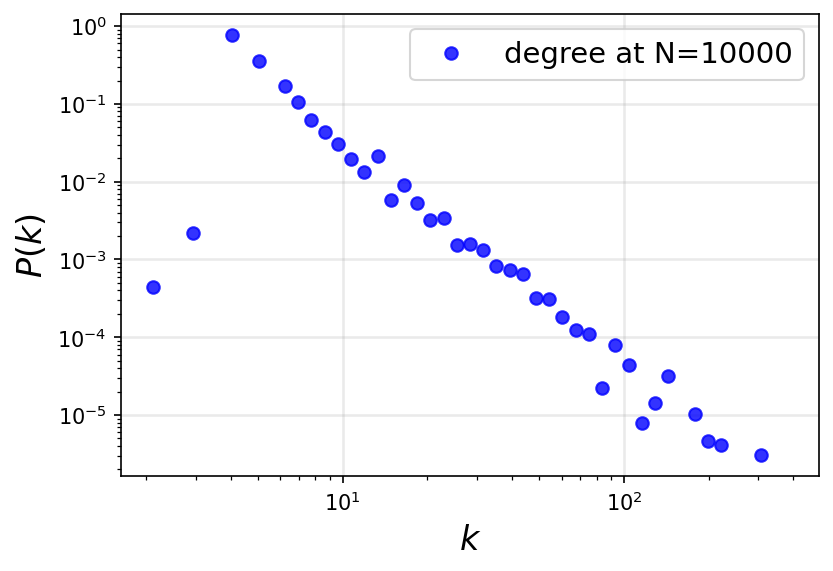

In [53]:
x,y = plot_degree(degree_distribution_store[3])
fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

ax.loglog(x, y,'o', color='blue', label='degree at N=10000', alpha=0.8)


ax.set_xlabel(r"$k$", fontsize=16)
ax.set_ylabel(r"$P(k)$", fontsize=16)
ax.legend(fontsize=14)

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

#plt.savefig('../figs/pngs/PolBlogs_inout_degreedist.png', dpi=425, bbox_inches='tight')
#plt.savefig('../figs/pdfs/PolBlogs_inout_degreedist.pdf', bbox_inches='tight')
plt.show()

In [87]:
fit1 = Fit(degree_distribution_store[1], discrete=True, xmin=4)
fit2 = Fit(degree_distribution_store[2], discrete=True, xmin=4)
fit3 = Fit(degree_distribution_store[3], discrete=True, xmin=4)

In [88]:
print(fit1.alpha)
print(fit2.alpha)
print(fit3.alpha)

2.6789734840598327
2.6453843030872477
2.67236255999614


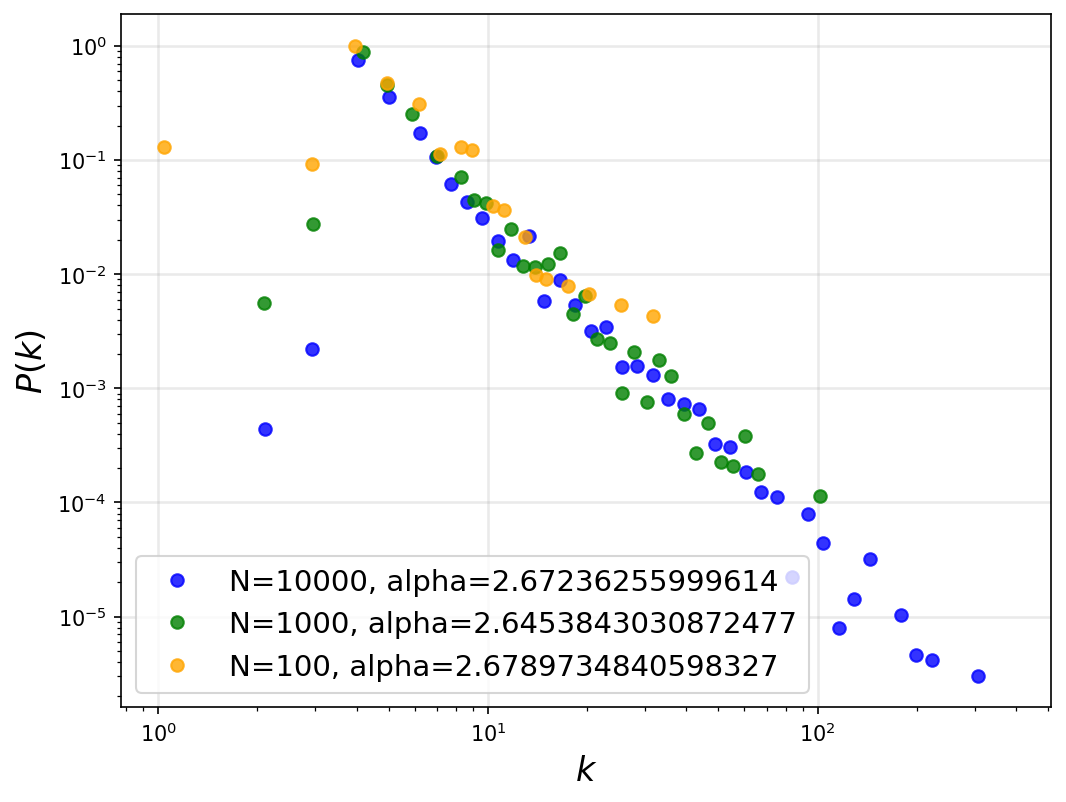

In [90]:
x3,y3 = plot_degree(degree_distribution_store[3])
x1,y1 = plot_degree(degree_distribution_store[1])
x2,y2 = plot_degree(degree_distribution_store[2])
fig, ax = plt.subplots(1,1,figsize=(8,6),dpi=150)

ax.loglog(x3, y3,'o', color='blue', label=f'N=10000, alpha={fit3.alpha}', alpha=0.8)
ax.loglog(x2, y2,'o', color='green', label=f'N=1000, alpha={fit2.alpha}', alpha=0.8)
ax.loglog(x1, y1,'o', color='orange', label=f'N=100, alpha={fit1.alpha}', alpha=0.8)

ax.set_xlabel(r"$k$", fontsize=16)
ax.set_ylabel(r"$P(k)$", fontsize=16)
ax.legend(fontsize=14)

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

#plt.savefig('../figs/pngs/PolBlogs_inout_degreedist.png', dpi=425, bbox_inches='tight')
#plt.savefig('../figs/pdfs/PolBlogs_inout_degreedist.pdf', bbox_inches='tight')
plt.show()

In [99]:
cumy1 = np.cumsum(y1)
cumy2 = np.cumsum(y2)
cumy3 = np.cumsum(y3)

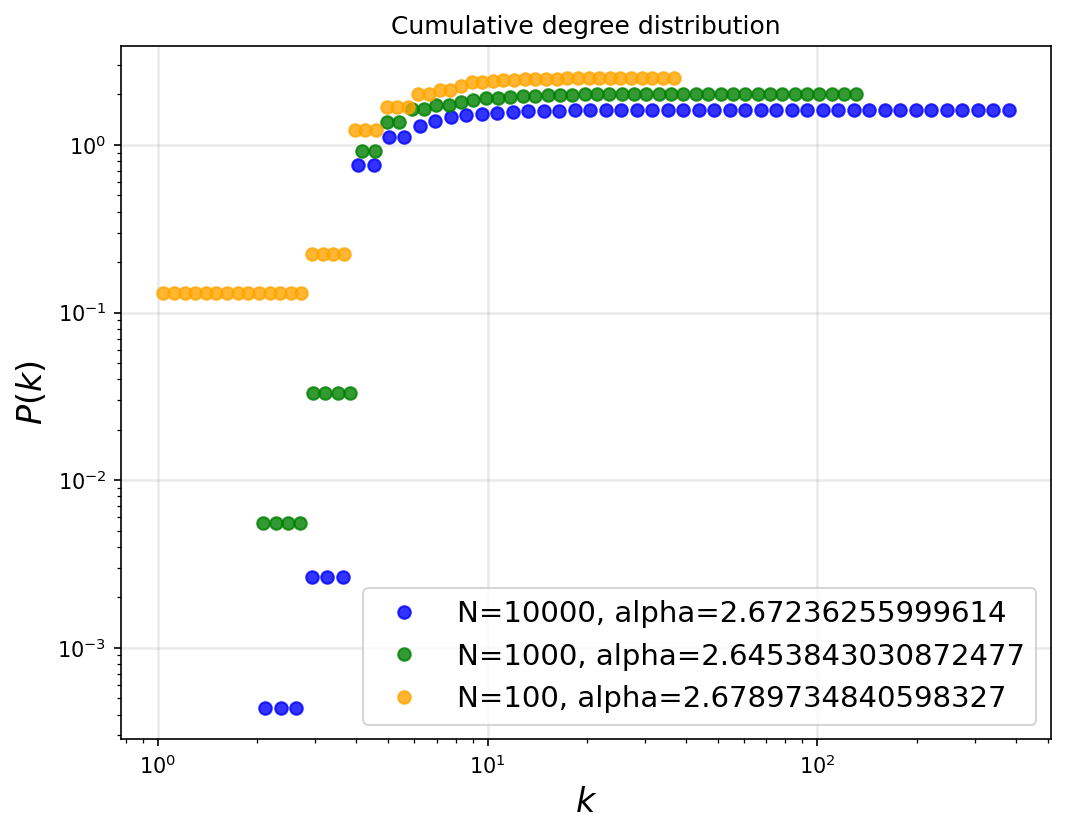

In [102]:
fig, ax = plt.subplots(1,1,figsize=(8,6),dpi=150)

ax.loglog(x3, cumy3,'o', color='blue', label=f'N=10000, alpha={fit3.alpha}', alpha=0.8)
ax.loglog(x2, cumy2,'o', color='green', label=f'N=1000, alpha={fit2.alpha}', alpha=0.8)
ax.loglog(x1, cumy1,'o', color='orange', label=f'N=100, alpha={fit1.alpha}', alpha=0.8)

ax.set_xlabel(r"$k$", fontsize=16)
ax.set_ylabel(r"$P(k)$", fontsize=16)
ax.legend(fontsize=14)
ax.set_title('Cumulative degree distribution')
ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

#plt.savefig('../figs/pngs/PolBlogs_inout_degreedist.png', dpi=425, bbox_inches='tight')
#plt.savefig('../figs/pdfs/PolBlogs_inout_degreedist.pdf', bbox_inches='tight')
plt.show()

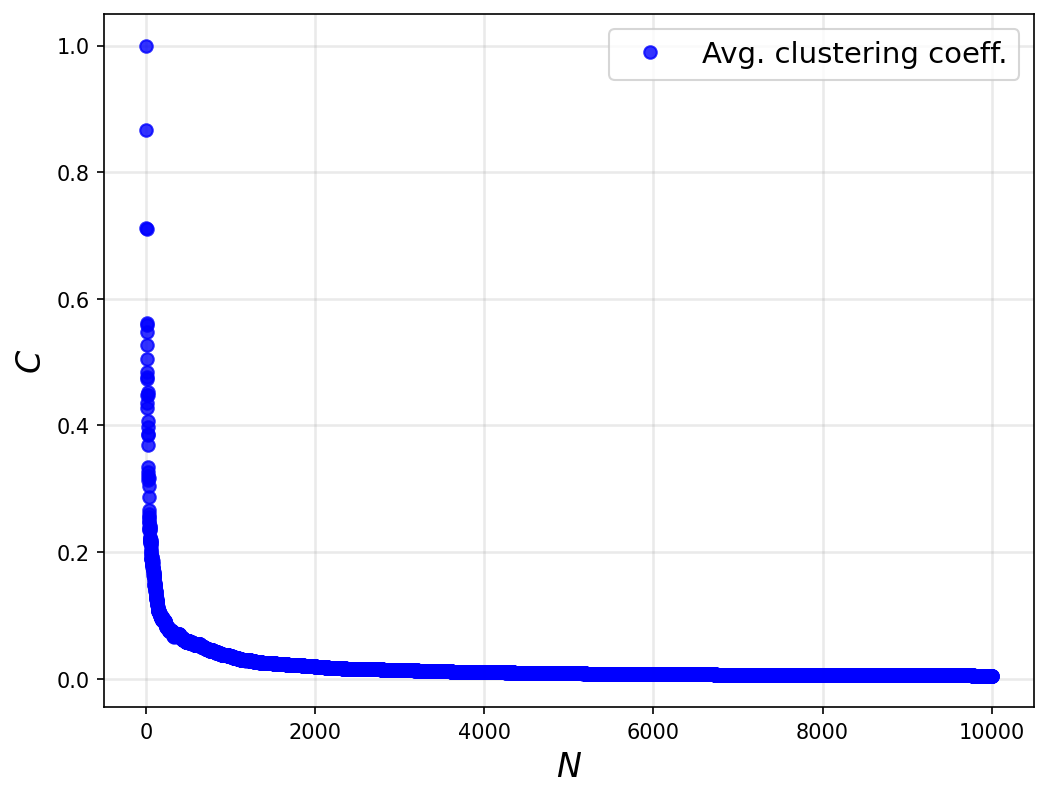

In [110]:
fig, ax = plt.subplots(1,1,figsize=(8,6),dpi=150)

ax.plot(range(4,4+len(clustering_score_store)), clustering_score_store,'o', color='blue', label=f'Avg. clustering coeff.', alpha=0.8)

ax.set_xlabel(r"$N$", fontsize=16)
ax.set_ylabel(r"$C$", fontsize=16)
ax.legend(fontsize=14)
#ax.set_title('Cumulative degree distribution')
ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

#plt.savefig('../figs/pngs/PolBlogs_inout_degreedist.png', dpi=425, bbox_inches='tight')
#plt.savefig('../figs/pdfs/PolBlogs_inout_degreedist.pdf', bbox_inches='tight')
plt.show()

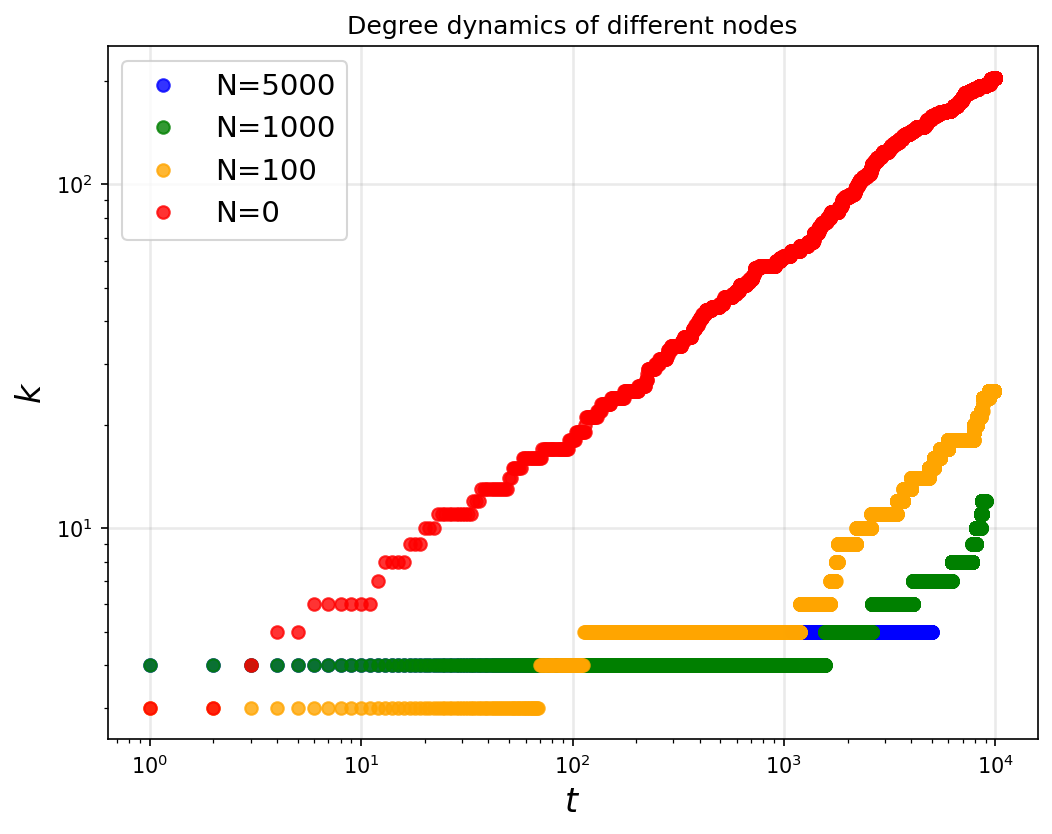

In [117]:
fig, ax = plt.subplots(1,1,figsize=(8,6),dpi=150)
x_common = range(4,10000)
ax.loglog(dynamics_tracker[5000],'o', color='blue', label=f'N=5000', alpha=0.8)
ax.loglog(dynamics_tracker[1000],'o', color='green', label=f'N=1000', alpha=0.8)
ax.loglog(dynamics_tracker[100],'o', color='orange', label=f'N=100', alpha=0.8)
ax.loglog(dynamics_tracker[0],'o', color='red', label=f'N=0', alpha=0.8)

ax.set_xlabel(r"$t$", fontsize=16)
ax.set_ylabel(r"$k$", fontsize=16)
ax.legend(fontsize=14)
ax.set_title('Degree dynamics of different nodes')
ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

#plt.savefig('../figs/pngs/PolBlogs_inout_degreedist.png', dpi=425, bbox_inches='tight')
#plt.savefig('../figs/pdfs/PolBlogs_inout_degreedist.pdf', bbox_inches='tight')
plt.show()